<a href="https://colab.research.google.com/github/h2k9971/GAN-basic/blob/main/5_1010%ED%8C%A8%ED%84%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt
import random
import numpy

In [24]:
def generate_real():
  real_data = torch.FloatTensor(
      [random.uniform(0.8, 1.0),
       random.uniform(0.0, 0.2),
       random.uniform(0.8, 1.0),
       random.uniform(0.0, 0.2)])
  return real_data

generate_real()

tensor([0.9825, 0.0187, 0.8721, 0.1285])

In [25]:
def generate_random(size):
  random_data = torch.rand(size)
  return random_data

In [30]:
class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.MSELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)

    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        
        # calculate loss
        loss = self.loss_function(outputs, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass
     


In [33]:
D = Discriminator()

for i in range(10000):

  D.train(generate_real(), torch.FloatTensor([1.0]))
  D.train(generate_random(4), torch.FloatTensor([0.0]))
  pass

counter =  10000
counter =  20000


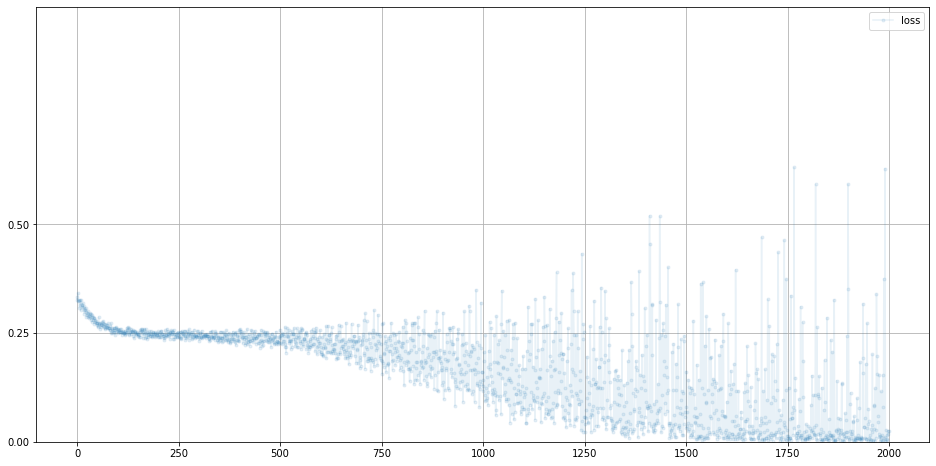

In [34]:
D.plot_progress()

In [35]:
print(D.forward( generate_real()).item() )
print(D.forward( generate_real()).item() )

0.8201503157615662
0.7576247453689575


In [42]:
class Generator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []

        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)

    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # calculate loss
        d_output = D.forward(g_output)

        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass
     


In [43]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.3246, 0.2750, 0.5286, 0.4383], grad_fn=<SigmoidBackward0>)

In [52]:
%%time

D = Discriminator()
G = Generator()

image_list = []
for i in range(10000):

  D.train(generate_real(), torch.FloatTensor([1.0]))

  D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))

  G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))

  if (i % 1000 == 0):
    image_list.append( G.forward(torch.FloatTensor([0.5])).detach().numpy() )
  pass


counter =  10000
counter =  20000
CPU times: user 17.9 s, sys: 37.1 ms, total: 18 s
Wall time: 18.1 s


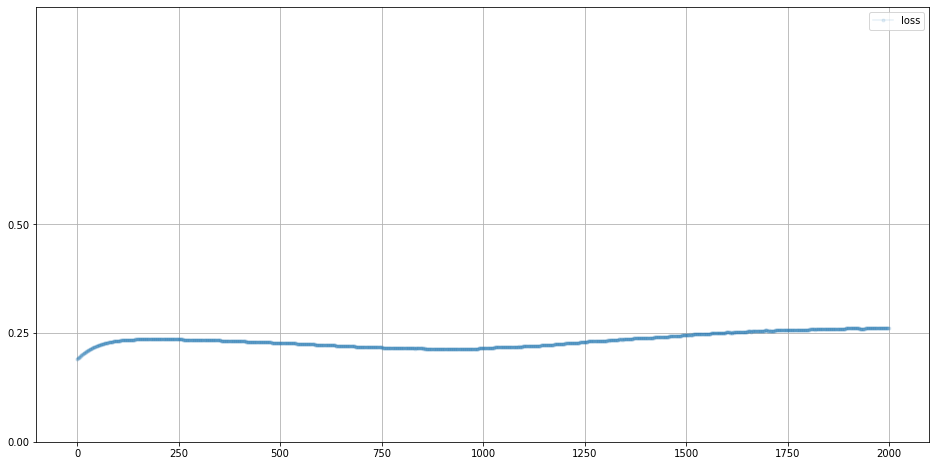

In [48]:
D.plot_progress()

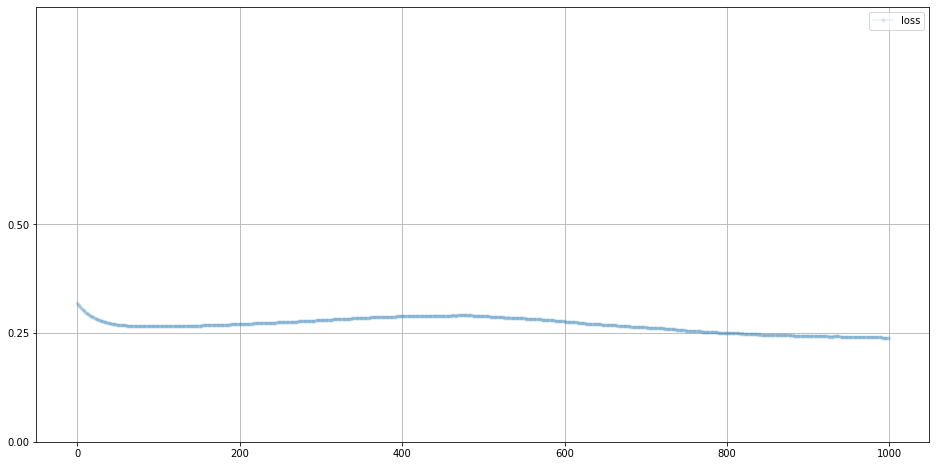

In [49]:
G.plot_progress()

In [50]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9290, 0.0635, 0.9391, 0.0664], grad_fn=<SigmoidBackward0>)

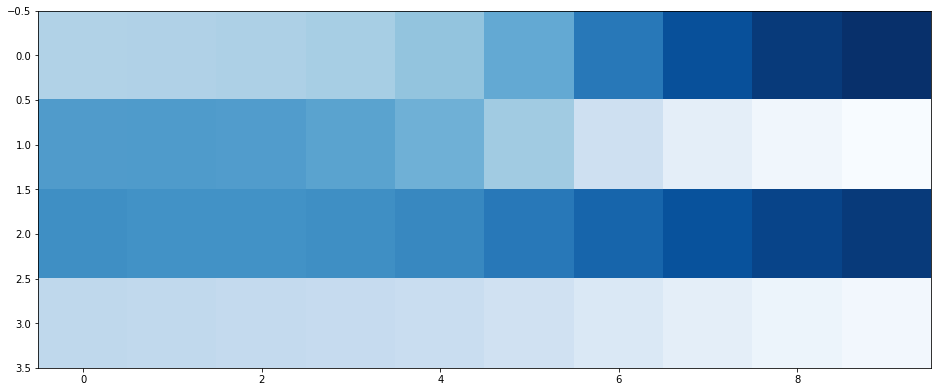

In [53]:
plt.figure(figsize = (16,8))

plt.imshow(numpy.array(image_list).T, interpolation='none', cmap='Blues')